In [11]:
import requests
import json
import pprint
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
response = requests.get("https://data.ntpc.gov.tw/api/datasets/71CD1490-A2DF-4198-BEF1-318479775E8A/json")
content = response.content
json_tree = json.loads(content)
pprint.pprint(json_tree)

for bike_rent_records in json_tree:
    leftRatio = float(bike_rent_records["sbi"]) / float(bike_rent_records["tot"]) * 100
    print("ID:{0} Left:{2:0.1f}% Name:{1}".format(bike_rent_records["sno"], bike_rent_records["aren"], leftRatio))

location= [i['sareaen'] for i in json_tree]
availbike =  np.array([int(i['tot'])for i in json_tree])-np.array([int(i['sbi'])for i in json_tree])

df = pd.DataFrame({'District': location,'Available bike': availbike})
df = df.groupby(by=["District"]).sum().reset_index()
df

[{'act': '1',
  'ar': '新北市新店區中正路700巷3號',
  'aren': 'No. 3, Lane 700 Chung Cheng Road, Xindian District',
  'bemp': '13',
  'lat': '24.99116',
  'lng': '121.53398',
  'mday': '20221021153425',
  'sarea': '新店區',
  'sareaen': 'Xindian Dist.',
  'sbi': '3',
  'sna': '大鵬華城',
  'snaen': 'Dapeng Community',
  'sno': '1001',
  'tot': '20'},
 {'act': '1',
  'ar': '南昌街/新昌路口(西側廣場)',
  'aren': 'Nanchang St./Xinchang Rd.',
  'bemp': '22',
  'lat': '25.068914',
  'lng': '121.662748',
  'mday': '20221021153440',
  'sarea': '汐止區',
  'sareaen': 'Xizhi Dist.',
  'sbi': '14',
  'sna': '汐止火車站',
  'snaen': 'Xizhi Railway Station',
  'sno': '1002',
  'tot': '44'},
 {'act': '1',
  'ar': '新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場)',
  'aren': 'Sec. 1, Xintai 5th Rd./Ren’ai Rd.',
  'bemp': '24',
  'lat': '25.064162',
  'lng': '121.658301',
  'mday': '20221021153445',
  'sarea': '汐止區',
  'sareaen': 'Xizhi Dist.',
  'sbi': '20',
  'sna': '汐止區公所',
  'snaen': 'Xizhi Dist. Office',
  'sno': '1003',
  'tot': '46'},
 {'act': '1

,District,Available bike
0,Luzhou Dist.,89
1,Sanchong Dist.,182
2,Xindian Dist.,68
3,Xinzhuang Dist.,118
4,Xizhi Dist.,286
5,Yonghe Dist.,49
6,Zhonghe Dist.,71


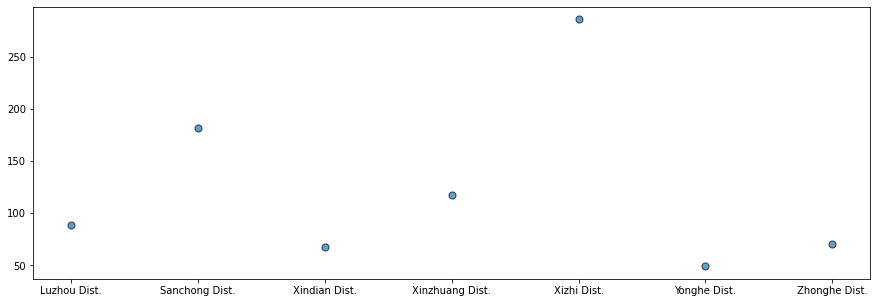

In [13]:
dist= df['District'].values
availbike= df['Available bike'].values

fig = plt.figure(figsize=(15, 5))
aa = fig.add_subplot(111)
aa = plt.scatter(data=df, x="District", y="Available bike", s=50, alpha=0.7, edgecolor='black', linewidth=1)
plt.savefig("Scatter Chart3.png", transparent=True)

In [3]:
lat= [i['lat'] for i in json_tree]
lng= [i['lng'] for i in json_tree]
distict= [i['sareaen'] for i in json_tree]
location= [i['snaen'] for i in json_tree]
availbike =  np.array([int(i['tot'])for i in json_tree])-np.array([int(i['sbi'])for i in json_tree])

df = pd.DataFrame({'District': location,'Available bike': availbike})
df = df.groupby(by=["District"]).sum().reset_index()
df

dfs = pd.DataFrame({'lat': lat,'lng': lng,'district': distict,'location': location,'Available bike': availbike},)
dfs

,lat,lng,district,location,Available bike
0,24.99116,121.53398,Xindian Dist.,Dapeng Community,18
1,25.068914,121.662748,Xizhi Dist.,Xizhi Railway Station,32
2,25.064162,121.658301,Xizhi Dist.,Xizhi Dist. Office,26
3,25.07315,121.662555,Xizhi Dist.,Cathay General Hospital,27
4,24.982830,121.543620,Xindian Dist.,MRT DaPingLin Station(Exit.5),30
5,25.064106,121.653019,Xizhi Dist.,Xike Railway Station(North),18
6,25.060125,121.483101,Sanchong Dist.,Xinghua Park,30
7,25.054391,121.488489,Sanchong Dist.,San chong Civil Sports Center,50
8,25.055883,121.484739,Sanchong Dist.,MRT Sanchong Sta. (Exit 3),17
9,25.066688,121.640367,Xizhi Dist.,Zhangshu Elementary School,16


In [4]:
import folium
m = folium.Map(location=[30, 15], zoom_start=2, tites='OpenStreetMap') # 建立一個地圖中心點的經緯度在30, 15，起始大小為2，使用'OpenStreetMap'模式的地圖。

In [15]:
for index, row in dfs.iterrows():
    information = 'district: '+ row['district'] + '<br>' + 'location: '+ row['location'] + '<br>'+ 'Available bike: '+ str(row['Available bike'])
    # information中將要彈出的信息串接在一起，並都轉變為string

# <br> 是讓顯示的字串換行
    folium.Marker(location=[row['lat'], row['lng']],
                 popup=folium.Popup(information, max_width=500), max_width='100'
                 ).add_to(m) # 將popup的尺寸重新設定，最後讓標示指定到m這張地圖上
m # 顯示地圖

In [8]:
from folium.plugins import MarkerCluster
Eqk_map = folium.Map(location=[30, 15], zoom_start=2, tites='OpenStreetMap') #建立新地圖
marker_cluster = MarkerCluster().add_to(Eqk_map) # 建立一個MakerCluster的物件讓物件指定到Eqk_map
for index, row in dfs.iterrows():
    information = 'district: '+ row['district'] + '<br>' + 'location: '+ row['location'] + '<br>'+ 'Available bike: '+ str(row['Available bike'])
    folium.Marker(location=[row['lat'], row['lng']], 
                  popup=folium.Popup(information, max_width=500), max_width='100').add_to(marker_cluster) # 一樣使用.Marker()，但指定到marker_cluster中
Eqk_map # 顯示地圖

In [5]:
from folium.plugins import HeatMap # 導入套件
Eqk_Heatmap = folium.Map(location=[30, 15], zoom_start=2, tites='OpenStreetMap') # 產生一個新的地圖
Heat_data = [[row['lat'], row['lng']] for index, row in dfs.iterrows()] # 這是準備要給HeatMap的資料，[[lat1,long1],[lat2,long2]...]
HeatMap(Heat_data).add_to(Eqk_Heatmap) #將資料放入HeatMap中，再指定到目標地圖上。
Eqk_Heatmap # 顯示地圖